Skin Detection

In [1]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

img_path = "/content/drive/MyDrive/cropped_face/쿨톤/고현정.jpg"
#Open a simple image
img = cv2.imread(img_path)

In [2]:
img_YCrCb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
YCrCb_mask = cv2.inRange(img_YCrCb, (0, 135, 85), (255,180,135))
YCrCb_mask = cv2.morphologyEx(YCrCb_mask, cv2.MORPH_OPEN, np.ones((3,3), np.uint8))

YCrCb_result = cv2.bitwise_not(YCrCb_mask)
YCrCb_skin_detected = cv2.bitwise_and(img, img, mask=YCrCb_mask)

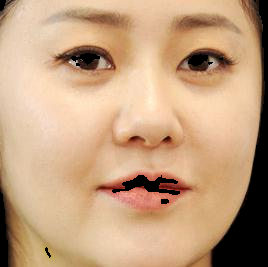

In [10]:
cv2_imshow(YCrCb_skin_detected)

In [1]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import colorsys
from skimage.color import rgb2lab

In [2]:
spring_warm_range = ([253.75, 152, 255])  # 봄웜 범위
summer_cool_range = ([254, 164.5, 219.25])  # 여름쿨 범위
autumn_warm_range = ([255, 190, 255])  # 가을웜 범위
winter_cool_range = ([255, 255, 99])  # 겨울쿨 범위

In [3]:
def in_range(pixel, color_range):
    for i in range(len(pixel)):
        if pixel[i] < color_range[0][i] or pixel[i] > color_range[1][i]:
            return False
    return True

In [4]:
def classify_season(image_data):
    # 이미지 배열에서 각 픽셀의 RGB 값 추출
    r_channel = image_data[:, :, 0]
    g_channel = image_data[:, :, 1]
    b_channel = image_data[:, :, 2]

    # 픽셀별로 계절 분류 수행
    result = np.zeros((image_data.shape[0], image_data.shape[1]))
    for i in range(image_data.shape[0]):
        for j in range(image_data.shape[1]):
            pixel = [r_channel[i, j], g_channel[i, j], b_channel[i, j]]
            if in_range(pixel, spring_warm_range):
                result[i, j] = 1  # 봄웜
            elif in_range(pixel, summer_cool_range):
                result[i, j] = 2  # 여름쿨
            elif in_range(pixel, autumn_warm_range):
                result[i, j] = 3  # 가을웜
            elif in_range(pixel, winter_cool_range):
                result[i, j] = 4  # 겨울쿨

    return result

In [7]:
# 이미지 로드
image = "/content/고현정.png"

# 이미지를 NumPy 배열로 변환
image_data = np.array(image)

# 계절 분류 수행
season_classification = classify_season(image_data)

# 결과 출력
print(season_classification)

IndexError: ignored

In [4]:
import numpy as np
from PIL import Image
spring_warm_range = ([0, 0, 190], [253.75, 152, 255])  # 봄웜 범위
summer_cool_range = ([190, 0, 0], [254, 164.5, 219.25])  # 여름쿨 범위
autumn_warm_range = ([100, 0, 190], [255, 190, 255])  # 가을웜 범위
winter_cool_range = ([190, 100, 0], [255, 255, 99])  # 겨울쿨 범위

In [6]:
def zero_shot_classification(color_vector):
    warm_similarity = np.dot(color_vector, warm_tone) / (np.linalg.norm(color_vector) * np.linalg.norm(warm_tone))
    cool_similarity = np.dot(color_vector, cool_tone) / (np.linalg.norm(color_vector) * np.linalg.norm(cool_tone))
    autumn_similarity = np.dot(color_vector, autumn_tone) / (np.linalg.norm(color_vector) * np.linalg.norm(autumn_tone))
    winter_similarity = np.dot(color_vector, winter_tone) / (np.linalg.norm(color_vector) * np.linalg.norm(winter_tone))

    similarities = {
        '봄': warm_similarity,
        '여름': cool_similarity,
        '가을': autumn_similarity,
        '겨울': winter_similarity
    }

    max_similarity = max(similarities.values())
    classified_tone = [tone for tone, similarity in similarities.items() if similarity == max_similarity]

    result = {}
    for tone, similarity in similarities.items():
        result[tone] = similarity * 100

    return result


In [12]:
from PIL import Image

# 이미지 파일 경로
# image_file_path = "이미지_파일_경로.jpg"  # 적절한 이미지 파일 경로로 변경해야 합니다

# 이미지 열기
# image = Image.open(image_file_path)

# 이미지의 RGB 값 가져오기
rgb_values = list(image1.getdata())

# RGB 값을 출력
print(rgb_values)

AttributeError: ignored

In [8]:
# 이미지 데이터 (numpy.ndarray)
image_data = np.array([[200, 150, 100], [50, 100, 150], [0, 0, 0]])  # 예시 이미지 데이터로 변경해야 합니다

# 이미지의 RGB 값을 가져오기
rgb_values = image_data.tolist()

# RGB 값을 출력
print(rgb_values)

[[200, 150, 100], [50, 100, 150], [0, 0, 0]]


In [13]:
# image = Image.open(image_file_path)

# 이미지를 NumPy 배열로 변환
image_array = np.array(image1)

# 이미지 배열 출력
print(image_array)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [ ]:
classification_result = zero_shot_classification(image1)
print(classification_result)

In [13]:
def within_range(color_vector, color_range):
    lower_bound, upper_bound = color_range
    return np.all(color_vector >= lower_bound) and np.all(color_vector <= upper_bound)

In [14]:
def season_classification(color_vector):
    spring_warm_prob = within_range(color_vector, spring_warm_range)
    summer_cool_prob = within_range(color_vector, summer_cool_range)
    autumn_warm_prob = within_range(color_vector, autumn_warm_range)
    winter_cool_prob = within_range(color_vector, winter_cool_range)

    total_prob = spring_warm_prob + summer_cool_prob + autumn_warm_prob + winter_cool_prob

    spring_warm_prob /= total_prob
    summer_cool_prob /= total_prob
    autumn_warm_prob /= total_prob
    winter_cool_prob /= total_prob

    return {
        "봄웜": spring_warm_prob,
        "여름쿨": summer_cool_prob,
        "가을웜": autumn_warm_prob,
        "겨울쿨": winter_cool_prob
    }

In [15]:
color_vector = np.array([200, 50, 150])

probabilities = season_classification(color_vector)
print(probabilities)

{'봄웜': 0.0, '여름쿨': 1.0, '가을웜': 0.0, '겨울쿨': 0.0}


KNN

In [1]:
import numpy as np
from PIL import Image
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import os

# 웜톤 이미지가 있는 폴더 경로
warm_tone_folder = "/content/drive/MyDrive/cropped_face/웜톤"

# 쿨톤 이미지가 있는 폴더 경로
cool_tone_folder = "/content/drive/MyDrive/cropped_face/쿨톤"

# 이미지를 저장할 리스트
images = []
labels = []

In [2]:
# 웜톤 폴더의 이미지 읽기
for filename in os.listdir(warm_tone_folder):
    if filename.endswith(".jpg") or filename.endswith(".jpeg"):
        image_path = os.path.join(warm_tone_folder, filename)
        image = Image.open(image_path)
        image_array = np.array(image)
        images.append(image_array.flatten())
        labels.append(0)  # 웜톤 레이블: 0

In [3]:
# 쿨톤 폴더의 이미지 읽기
for filename in os.listdir(cool_tone_folder):
    if filename.endswith(".jpg") or filename.endswith(".jpeg"):
        image_path = os.path.join(cool_tone_folder, filename)
        image = Image.open(image_path)
        image_array = np.array(image)
        images.append(image_array.flatten())
        labels.append(1)  # 쿨톤 레이블: 1

In [4]:
# 데이터셋 분할: 학습 데이터와 테스트 데이터
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [5]:
# K-NN 분류기 생성 및 학습
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=order, dtype=dtype)


ValueError: ignored

In [6]:
# 분류기를 사용하여 테스트 이미지 분류
test_image_path = "/content/drive/MyDrive/cropped_face/쿨톤/고현정.jpg"
test_image = Image.open(test_image_path)
test_image_array = np.array(test_image)
test_image_vector = test_image_array.flatten()

In [7]:
# 분류 결과 출력
if prediction[0] == 0:
    print("웜톤 이미지입니다.")
else:
    print("쿨톤 이미지입니다.")

NameError: ignored